# Analysis of life expectancy of developing countries in 2015

### * Problem:
This project shows approaches the formulation of a model that can describe life expectancy of third world countries in an specific year, 2015 in this case.
### * Purpose:
Obtaining a model in this project is useful in further studies for predicting how is life expectancy changing across the years.
### * Dataset:
The data used in this model was obtained directly from Kaggle ([link to the repository](https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who)). This dataset was made taking The Global Health Observatory official repository website.
### * Procedure:

1. Data preprocessing

1. Modeling design: This procedure applies for both designed models, one uses the normal distributon and the other the gamma.
    * Prior: Considering the normalized histogram, the values for the priors were selected manually just by trying to find a similarity with the original data histogram. Also, each parameter for the normal and gamma distributions were modelled as normal and with a standart deviation approximadelty as 30% of the mean.

    * Fiting: From obtaining a prior, the fiting was performed taking the normalized life expectency.
    
    * Posterior prediction: In the same fiting stan model, it was generated a prediction using the same parameters fitted in one iteration.


1. Models comparisson:
    * Normalized histograms of original normalized data, prior and posterior prediction were plotted. Perhaps this does not give a quantified comparisson. It does show how posterior predicted fits better to original data.
    
    * Both models were compared using WAIC and LOO information criteria. This does give quantified comparisson criteria.


In [128]:
from cmdstanpy import CmdStanModel

import arviz as az
import numpy as np
import scipy.stats as stats

import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl

# 1. Data preprocessing

The complete dataset from Kaggle was not used, the life expectancy column was filtered considering the country is developing and the year is 2015. Then it was normalized using Linear scaling method.

Enventhough the selected year 2015, it is important to point out that the histograms in each other year are pretty similar between them. Therefore, the same model could also be applied on the data from other years. 

In [129]:
data = pd.read_csv('./Life_Expectancy_Data.csv',index_col=0)

In [130]:
data.head()

,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [131]:
subset=data[['Year','Status','Life expectancy ']]
df_2015_dev=subset.loc[(subset.Year==2015) & (subset.Status=='Developing')]

min__all_values_2015=subset['Life expectancy '].min()
max__all_values_2015=subset['Life expectancy '].max()

life_exp_norm_2015= (df_2015_dev['Life expectancy '] - min__all_values_2015 )/(max__all_values_2015-min__all_values_2015)
df_2015_dev.insert(loc=3,column='Life_exp_norm',value=life_exp_norm_2015)
df_2015_dev

,Year,Status,Life expectancy,Life_exp_norm
Country,,,,
Afghanistan,2015,Developing,65.0,0.544592
Albania,2015,Developing,77.8,0.787476
Algeria,2015,Developing,75.6,0.745731
Angola,2015,Developing,52.4,0.305503
Antigua and Barbuda,2015,Developing,76.4,0.760911
...,...,...,...,...
Venezuela (Bolivarian Republic of),2015,Developing,74.1,0.717268
Viet Nam,2015,Developing,76.0,0.753321
Yemen,2015,Developing,65.7,0.557875


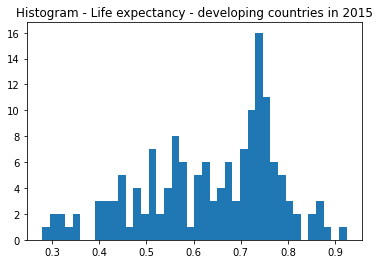

In [132]:
plt.hist(life_exp_norm_2015,bins=40)
plt.title("Histogram - Life expectancy - developing countries in 2015")
plt.show()

# MODELS
There are prensented two models, first model uses the normal distributon, and the second one uses gamma distribution.

At the begining, the first approach was the normal distribution. Then it was evaluated to get an overlaping or mixed distribution. However, beacuse of its complexity and as a suggestion of the professor, a gamma model was taked in account as second model. Eventhough each model migth not seem perfectly accuarate to fit with the original data, at the end it is a matter of comparing using quantified parameters.


Each one of the choosen models are described deeply in its respective section.

Also, it is shown the prior of the mixed model that can be considered in future projects.


## MIXED MODEL

This model was a second approach, but beacuse of the complexity and errors encountered when trying to a fit into the real data, and a as suggestion from the professor, it was changed to a gamma distirbution. However, it is shown in this notebook as a way of proposal for further researching projects. The model for it is in the mixed_model.stan archive.

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start procesing
chain 1 |          | 00:00 Status


chain 1 |██████████| 00:00 Sampling completed
chain 2 |██████████| 00:00 Sampling completed
chain 3 |██████████| 00:00 Sampling completed
chain 4 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


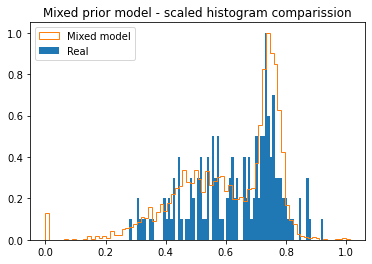

In [133]:
model_mixed=CmdStanModel(stan_file='mixed_model.stan')

R = 1000
sim_mixed=model_mixed.sample(iter_sampling=R,
                     iter_warmup=0,
                     chains=4,
                     fixed_param=True,
                     seed=29042020,refresh=R)

(counts_1, bins_1) = np.histogram(life_exp_norm_2015, bins=80)
(counts_2, bins_2) = np.histogram(sim_mixed.stan_variable('life_exp'), bins=80)

plt.hist(bins_1[:-1], bins_1, weights=(1/(max(counts_1)))*counts_1)
plt.hist(bins_2[:-1], bins_2, weights=(1/(max(counts_2)))*counts_2, histtype='step')

plt.legend(labels=["Mixed model","Real"],loc="upper left")
plt.title("Mixed prior model - scaled histogram comparission")
plt.show()

## MODEL 1 - Normal distirbution

### M1 - Prior model

This model structure is:

   * mu ~ normal(0.6,0.2)
   * sigma ~ normal(0.15,0.05)
   * life_exp ~ normal(mu,sigma)

The values were obtained manually, looking at the histogram obtained of life_exp and real data.  It was used this [online plotter](https://homepage.divms.uiowa.edu/~mbognar/applets/beta.html).

Mu and sigma were modelled as normal distributions, with a standart deviation approximadelty as 30% of the mean. This perfentage was choosen so there could be a decent range for possible values when fitting the model.

In [134]:
model_ppc=CmdStanModel(stan_file='2015_dev_ppc_1.stan')

R = 1000
sim_1=model_ppc.sample(iter_sampling=R,
                     iter_warmup=0,
                     chains=4,
                     fixed_param=True,
                     seed=29042020,refresh=R)


#plt.hist(sim_1.stan_variable('life_exp'), bins=80, label= "life_exp", histtype='step')
#plt.legend(loc="upper left")
#plt.title("(model 1) Histogram - prior - Life expectancy - normal distribution")
#plt.show()

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start procesing
chain 1 |          | 00:00 Status


chain 1 |██████████| 00:00 Sampling completed
chain 2 |██████████| 00:00 Sampling completed
chain 3 |██████████| 00:00 Sampling completed
chain 4 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


### M1 - Fitting model

In [135]:
data_to_fit=dict(N=len(life_exp_norm_2015),life_exps=life_exp_norm_2015)

model_1_fit=CmdStanModel(stan_file='2015_dev_fit_1.stan')
fit_model_1=model_1_fit.sample(data=data_to_fit,seed=28052020)
fit_model_1.summary()

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start procesing
chain 1 |          | 00:00 Status



chain 1 |██████▎   | 00:00 Iteration: 1100 / 2000 [ 55%]  (Sampling)

chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


,Mean,MCSE,StdDev,5%,50%,95%,N_Eff,N_Eff/s,R_hat
name,,,,,,,,,
lp__,220.00,0.02700,1.000,220.00,220.00,220.00,1500.00,840.00,1.0
mu,0.63,0.00021,0.012,0.62,0.63,0.65,3000.00,1700.00,1.0
sigma,0.14,0.00015,0.008,0.13,0.14,0.16,3000.00,1700.00,1.0
log_lik[1],0.82,0.00140,0.083,0.72,0.83,0.92,3434.00,1894.00,1.0
log_lik[2],0.44,0.00160,0.092,0.29,0.44,0.58,3180.00,1754.00,1.0
...,...,...,...,...,...,...,...,...,...
life_exp_generated[148],0.63,0.00250,0.150,0.39,0.63,0.87,3632.00,2003.00,1.0
life_exp_generated[149],0.63,0.00240,0.150,0.39,0.63,0.87,3889.00,2145.00,1.0
life_exp_generated[150],0.63,0.00240,0.150,0.39,0.64,0.88,4127.00,2276.00,1.0


In [136]:
#plt.hist(fit_model_1.stan_variable('life_exp_generated_v2'), bins=80, label= "life_exp", histtype='step')
#plt.legend(loc="upper left")
#plt.title("(model 1) Histogram - post prediction - Life expectancy - normal distribution")
#plt.show()

### M1 - Normalized histograms

In this section, there is plotted normalized hitograms of the prior, the posterior predictive and the real data. It can be observed how the prior is not that much accuarate in comparison to the posterior fitted model. It is "fitted". However, this doesn't show a quantified parameter that can help to decide which model fits better. For this reason, it is used WAIC and LOO critreria for finding a the most accuarate model.

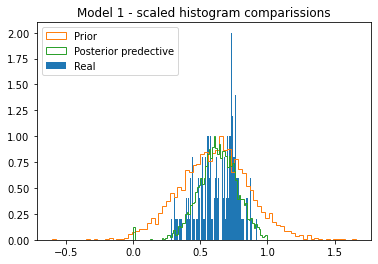

In [137]:
(counts_1, bins_1) = np.histogram(life_exp_norm_2015, bins=80)
(counts_2, bins_2) = np.histogram(sim_1.stan_variable('life_exp'), bins=80)
(counts_3, bins_3) = np.histogram(fit_model_1.stan_variable('life_exp_generated_v2'), bins=80)

plt.hist(bins_1[:-1], bins_1, weights=(2/(max(counts_1)))*counts_1)
plt.hist(bins_2[:-1], bins_2, weights=(1/(max(counts_2)))*counts_2, histtype='step')
plt.hist(bins_3[:-1], bins_3, weights=(1/(max(counts_3)))*counts_3, histtype='step')

plt.legend(labels=["Prior","Posterior predective","Real"],loc="upper left")
plt.title("Model 1 - scaled histogram comparissions")
plt.show()

## MODEL 2 - GAMMA Distribution

### M2 - Prior model

This model structure is:


   * alpha ~ normal (9, 2)
   * beta ~ normal (0.07, 0.02)
   * life_exp ~ gamma (alpha, beta)

The values were obtained manually, looking at the histogram obtained of life_exp and real data. It was used this [online plotter](https://homepage.divms.uiowa.edu/~mbognar/applets/gamma.html)

Alpha and beta were modelled as normal distributions, with a standart deviation approximadelty as 25% of the mean. This perfentage was choosen so there could be a decent range for possible values when fitting the model.
This statistical distribution was chosen beacuse the curve is different to the normal distribution and in a simple graphic comparison, the original data has also a similarity in its histogram curves with gamma distribution.

In [138]:
model_ppc_2=CmdStanModel(stan_file='2015_dev_ppc_2.stan')

R = 4000
sim_2=model_ppc_2.sample(iter_sampling=R,
                     iter_warmup=0,
                     chains=4,
                     fixed_param=True,
                     seed=29042020,refresh=R)


#plt.hist(sim_2.stan_variable('life_exp'), bins=160, label= "life_exp", histtype='step')
#plt.legend(loc="upper left")
#plt.title("(model 2)Histogram - prior - Life expectancy - gamma distribution")
#plt.show()

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start procesing
chain 1 |          | 00:00 Status


chain 1 |██████████| 00:00 Sampling completed
chain 2 |██████████| 00:00 Sampling completed
chain 3 |██████████| 00:00 Sampling completed
chain 4 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


### M2 - Fitting model

In [139]:
data_to_fit=dict(N=len(life_exp_norm_2015),life_exps=life_exp_norm_2015)

model_2_fit=CmdStanModel(stan_file='2015_dev_fit_2.stan')
fit_model_2=model_2_fit.sample(data=data_to_fit,seed=28052020)

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start procesing
chain 1 |          | 00:00 Status


chain 1 |██▎       | 00:00 Iteration:  300 / 2000 [ 15%]  (Warmup)



chain 1 |█████▉    | 00:00 Iteration: 1001 / 2000 [ 50%]  (Sampling)

chain 1 |████████▋ | 00:00 Iteration: 1600 / 2000 [ 80%]  (Sampling)


chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


In [140]:
fit_model_2.summary()

,Mean,MCSE,StdDev,5%,50%,95%,N_Eff,N_Eff/s,R_hat
name,,,,,,,,,
lp__,64.000,0.02800,0.9600,62.000,64.000,65.000,1200.00,450.00,1.0
alpha,13.000,0.04200,1.2000,11.000,13.000,15.000,750.00,290.00,1.0
beta,0.048,0.00016,0.0043,0.041,0.048,0.055,730.00,280.00,1.0
log_lik[1],0.820,0.00160,0.0520,0.740,0.830,0.910,1029.00,397.00,1.0
log_lik[2],0.270,0.00120,0.0730,0.140,0.270,0.390,3676.00,1418.00,1.0
...,...,...,...,...,...,...,...,...,...
life_exp_generated[148],0.630,0.00290,0.1800,0.380,0.620,0.950,3927.00,1515.00,1.0
life_exp_generated[149],0.630,0.00290,0.1700,0.370,0.610,0.940,3645.00,1406.00,1.0
life_exp_generated[150],0.630,0.00280,0.1800,0.370,0.620,0.950,4016.00,1549.00,1.0


In [141]:
median_generated_model_2=np.percentile(fit_model_2.stan_variable('life_exp_generated')[:,:],50,axis=0)

#plt.hist(fit_model_2.stan_variable('life_exp_generated_v2'), bins=80, label= "life_exp", histtype='step')
#plt.legend(loc="upper left")
#plt.title("(model 2)Histogram - post prediction - Life expectancy - normal distribution")
#plt.show()

### M2 - Normalized histograms

In this section, there is plotted normalized hitograms of the prior, the posterior predictive and the real data. It can be observed how the prior is not that much accuarate in comparison to the posterior fitted model. It is "fitted".However, this doesn't show a quantified parameter that can help to decide which model fits better. For this reason, it is used WAIC and LOO critreria for finding a the most accuarate model.

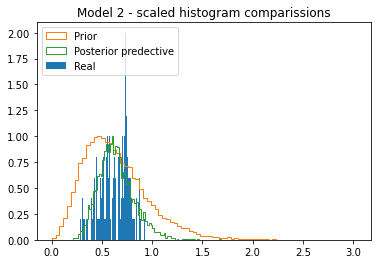

In [142]:
(counts_1, bins_1) = np.histogram(life_exp_norm_2015, bins=80)
(counts_2, bins_2) = np.histogram(sim_2.stan_variable('life_exp'), bins=80)
(counts_3, bins_3) = np.histogram(fit_model_2.stan_variable('life_exp_generated_v2'), bins=80)

plt.hist(bins_1[:-1], bins_1, weights=(2/(max(counts_1)))*counts_1)
plt.hist(bins_2[:-1], bins_2, weights=(1/(max(counts_2)))*counts_2, histtype='step')
plt.hist(bins_3[:-1], bins_3, weights=(1/(max(counts_3)))*counts_3, histtype='step')

plt.legend(labels=["Prior","Posterior predective","Real"],loc="upper left")
plt.title("Model 2 - scaled histogram comparissions")
plt.show()

# COMPARISSON - WAIC and LOO

In [143]:
results = {'result_model_1': fit_model_1,'result_model_2': fit_model_2}

### WAIC

In the comparison graph it can be observed that the model 1 has a  higher WAIC, thus it can be considered as better in comparison to model 2. However, the overlaping can not ignored at all. Also, model 1 has a bigger standar deviation.

,rank,waic,p_waic,d_waic,weight,se,dse,warning,waic_scale
result_model_1,0,78.245564,2.120469,0.000000,1.000000e+00,7.464507,0.000000,False,log
result_model_2,1,69.275177,1.089976,8.970386,1.474376e-13,5.717428,2.622727,False,log


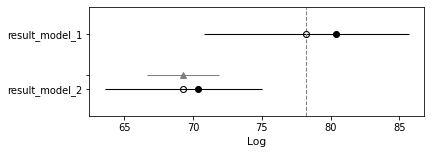

In [144]:
comparisson_waic_1 = az.compare(results, ic = 'waic')
az.plot_compare(comparisson_waic_1)
comparisson_waic_1

In the comparison graph it can be observed that the model 1 has a  higher LOO, thus it can be considered as better in comparison to model 2. Pretty similar results as WAIC.

c:\ProgramData\Anaconda3\lib\site-packages\arviz\stats\stats.py:811: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(


,rank,loo,p_loo,d_loo,weight,se,dse,warning,loo_scale
result_model_1,0,78.368545,1.997488,0.000000,1.0,7.476411,0.000000,True,log
result_model_2,1,69.275029,1.090124,9.093516,0.0,5.717463,2.630865,False,log


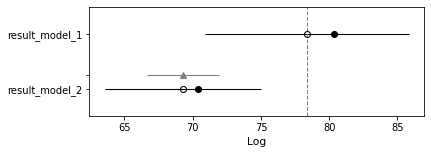

In [145]:
comparisson_loo_1 = az.compare(results, ic = 'loo')
az.plot_compare(comparisson_loo_1)
comparisson_loo_1

# Conclusions

* A normal distribution is more suitable than a gamma distribution for modelling the life expectancy in developing countries in 2015.
* A mixed distribution can be considered for future research projects for life expectancy modelling.
* A prior model does not necesarilly has to be pretty similar to the original data.
* Quantity criteria is required for comparing performance of models. However, it is not totally accuarate as it also has standat deviation and overlaping.